In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.datasets import mnist, fashion_mnist

import autokeras as ak

import cv2
import os
import pathlib

In [2]:
# 현재 스크립트 실행 경로 출력
print(os.getcwd())
# c:\workspace\autoencoder\02_autoencoder

c:\workspace\autoencoder\02_autoencoder


In [3]:
# 스크립트 실행 경로 변경
# c:\workspace\autoencoder\02_autoencoder 으로 변경
os.chdir('c:/workspace/autoencoder/02_autoencoder')

In [4]:
# 현재 스크립트 실행 경로 출력
print(os.getcwd())

c:\workspace\autoencoder\02_autoencoder


In [5]:

'''
2. Load training images  
'''
# resize and normalize data for training


def create_training_data(data_path, size=224):
    training_data = []
    # for category in CATEGORIES:  # "baseline" and "rattle"

    #     path = os.path.join(data_path, category)  # create path
    #     # get the classification  (0 or a 1). 0=baseline 1=rattle
    #     class_index = CATEGORIES.index(category)

    # iterate over each image
    for image in os.listdir(data_path):
        try:
            data_path = pathlib.Path(data_path)
            full_name = str(pathlib.Path.joinpath(data_path, image))
            data = cv2.imread(str(full_name), 0)
            # resize to make sure data consistency
            resized_data = cv2.resize(data, (size, size))
            # add this to our training_data
            training_data.append([resized_data])
        except Exception as err:
            print("an error has occureC: ", err, str(full_name))

    # normalize data
    training_data = np.array(training_data)/255.
    # reshape
    training_data = np.array(training_data).reshape(-1, size, size)
    return training_data



In [6]:
'''
2. Load training images
'''
# ok
data_path = "./dataset/36cc_out/normal"
X_train_ok = create_training_data(data_path)
y_train_ok = np.zeros(int(len(X_train_ok))).astype(int).reshape((-1,1))

# not_ok
data_path = "./dataset/36cc_out/x_train_nok"
X_train_not_ok = create_training_data(data_path)
y_train_not_ok = np.ones(int(len(X_train_not_ok))).astype(int).reshape((-1,1))

# concatenate ok and not_ok
# 데이터 합치기
# X_train_ok(36)+X_train_not_ok(2)=38
x_train = np.concatenate((X_train_not_ok, X_train_ok))
y_train = np.concatenate((y_train_not_ok, y_train_ok))

# test_ok
data_path = "./dataset/36cc_out/normal_test"
X_train_test_ok = create_training_data(data_path)
y_train_test_ok = np.zeros(int(len(X_train_test_ok))).astype(int).reshape((-1,1))

# test_nok
data_path = "./dataset/36cc_out/x_test_nok"
X_train_test_not_ok = create_training_data(data_path)
y_train_test_not_ok = np.ones(int(len(X_train_test_not_ok))).astype(int).reshape((-1,1))

# concatenate ok and not_ok
# 데이터 합치기
# X_train_ok(36)+X_train_not_ok(2)=38
x_test = np.concatenate((X_train_test_ok, X_train_test_not_ok))
y_test = np.concatenate((y_train_test_ok, y_train_test_not_ok))

In [7]:
# https://autokeras.com/tutorial/image_classification/
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(37, 224, 224)
(37, 1)
[[1]
 [0]
 [0]]


In [8]:
print(x_test.shape)  # (60000, 28, 28)
print(y_test.shape)  # (60000,)
print(y_test[:3])  # array([7, 2, 1], dtype=uint8)

(3, 224, 224)
(3, 1)
[[0]
 [0]
 [1]]


c:\Users\astro\anaconda3\envs\ae2\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


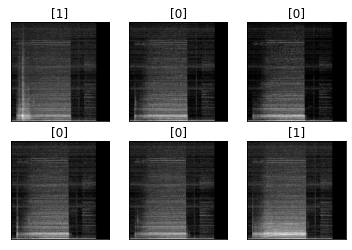

In [9]:
n = 3
plt.figure(figsize=(6, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])#, cmap='gray')
  plt.title(y_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the image classifier with training data.

In [11]:
clf.fit(x_train, y_train, epochs=1000)

Trial 1 Complete [00h 00m 10s]
val_loss: 3.830912752475587e-28

Best val_loss So Far: 3.830912752475587e-28
Total elapsed time: 00h 00m 10s
INFO:tensorflow:Oracle triggered exit
Epoch 1/1000
2/2 [==============================] - 1s 281ms/step - loss: 0.6119 - accuracy: 0.5135
Epoch 2/1000
2/2 [==============================] - 0s 32ms/step - loss: 2.3515 - accuracy: 0.9730
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 2.5762 - accuracy: 0.9730
Epoch 4/1000
2/2 [==============================] - 0s 32ms/step - loss: 2.0930 - accuracy: 0.9730
Epoch 5/1000
2/2 [==============================] - 0s 31ms/step - loss: 1.5158 - accuracy: 0.9730
Epoch 6/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9512 - accuracy: 0.9730
Epoch 7/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.5325 - accuracy: 0.9730
Epoch 8/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2773 - accuracy: 0.9730
Epoch 9/1000
2/2 [===========

In [12]:
# # CPU 학습
# print("CPU를 사용한 학습")
# with tf.device("/device:CPU:0"):
#   clf.fit(x_train, y_train, epochs=3)

In [13]:
# # GPU 학습
# print("GPU를 사용한 학습")
# with tf.device("/device:GPU:0"):
#   clf.fit(x_train, y_train, epochs=3)

In [14]:
# Export as a Keras Model
model = clf.export_model()
print(type(model.summary()))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224)]        0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 224, 224)         0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 224, 224, 1)      0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 224, 224, 1)      3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                             

In [15]:
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y[:10])

1/1 [==============================] - 0s 26ms/step
[[0.]
 [0.]
 [0.]]


In [16]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

1/1 [==============================] - 0s 198ms/step - loss: 4.1802 - accuracy: 0.6667
[4.180212020874023, 0.6666666865348816]


In [17]:
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

In [18]:
from tensorflow.keras.utils import plot_model

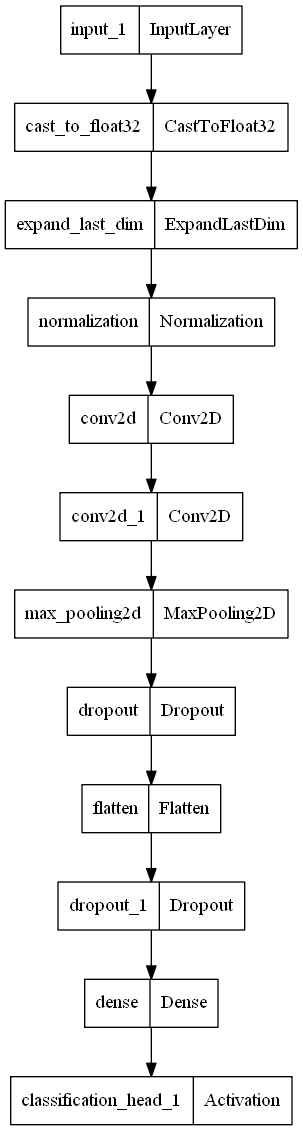

In [19]:
plot_model(model, "C:/workspace/autoencoder/03_ELECTRIC-ENGINE/my_first_model.png")

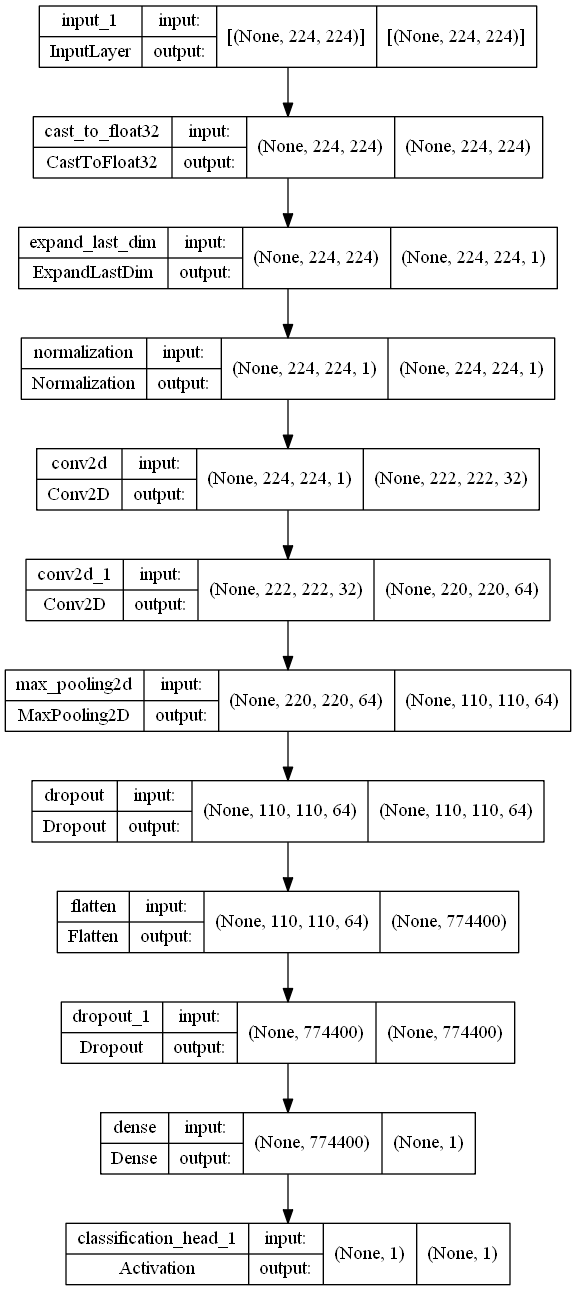

In [20]:
plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

import autokeras as ak

In [22]:
# print(tf.__version__)
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Initialize the image classifier.
# clf = ak.ImageClassifier(
#     overwrite=True, max_trials=1
# )  # Try only 1 model.(Increase accordingly)
# # Feed the image classifier with training data.
# clf.fit(x_train, y_train, epochs=1)  # Change no of epochs to improve the model
# # Export as a Keras Model.
# model = clf.export_model()

# print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras", save_format="tf")
# except Exception:
#     model.save("model_autokeras.h5")


# loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

# predicted_y = loaded_model.predict(tf.expand_dims(x_test, -1))
# print(predicted_y)